Importing Pandas and Data+Cleaning

In [1]:
import pandas as pd

In [2]:
adult_df=pd.read_csv (r'archive\Adult Mortality.csv')
adult_df.columns=adult_df.iloc[0]
adult_df=adult_df[1:]

In [3]:
maternal_df=pd.read_csv (r'archive\Maternal mortality.csv')

In [4]:
number_df=pd.read_csv (r'archive\Number of deaths (thousands).csv')
number_df.columns=number_df.iloc[0]
number_df=number_df[1:]

In [5]:
prob_df=pd.read_csv (r'archive\Probability of dying per 1000 live births.csv')
prob_df.columns=prob_df.iloc[0]
prob_df=prob_df[1:]

In [6]:
adult_df.head()

,Country,Year,Both sexes,Male,Female
1,Afghanistan,2016,245,272,216
2,Afghanistan,2015,233,254,210
3,Afghanistan,2014,234,254,213
4,Afghanistan,2013,235,254,215
5,Afghanistan,2012,242,262,221


In [7]:
maternal_df.head()

,Country,Year,Maternal mortality ratio (per 100 000 live births),Number of maternal deaths
0,Afghanistan,2017,638 [ 427 - 1 010 ],7 700 [ 5 100 - 12 000 ]
1,Afghanistan,2016,673 [ 457 - 1 040 ],8 100 [ 5 500 - 12 000 ]
2,Afghanistan,2015,701 [ 501 - 1 020 ],8 400 [ 6 000 - 12 000 ]
3,Afghanistan,2014,786 [ 592 - 1 080 ],9 300 [ 7 000 - 13 000 ]
4,Afghanistan,2013,810 [ 617 - 1 080 ],9 600 [ 7 300 - 13 000 ]


In [8]:
number_df.head()

,Country,Year,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes
1,Afghanistan,2018,74278,40312,33966,57182,31394,25788,44725
2,Afghanistan,2017,76877,41631,35246,58846,32244,26602,45771
3,Afghanistan,2016,79770,43134,36636,60673,33222,27451,46963
4,Afghanistan,2015,82918,44733,38185,62652,34257,28395,48237
5,Afghanistan,2014,86378,46509,39869,64808,35410,29398,49715


In [9]:
prob_df.head()

,Country,Year,Both sexes,Male,Female,Both sexes,Both sexes,Male,Female
1,Afghanistan,2018,47.9,51.1,44.5,37.1,62.3,65.7,58.7
2,Afghanistan,2017,49.5,52.7,46,38.1,64.7,68.1,61.1
3,Afghanistan,2016,51.2,54.5,47.7,39.3,67.5,70.9,63.7
4,Afghanistan,2015,53.1,56.5,49.6,40.5,70.4,73.8,66.7
5,Afghanistan,2014,55.1,58.6,51.5,41.9,73.6,77,69.9


SQLite3 and creation of databases
I have decided to split the data into tables by the year of each of entry. Some data require splitting into multiple tables sharing the year.

In [10]:
import sqlite3 as lite

In [11]:
con_adult=lite.connect('adult.df')

In [12]:
con_maternal=lite.connect('maternal.df')

In [13]:
con_number=lite.connect('number.df')

In [14]:
con_prob=lite.connect('prob.df')

Adult Mortality Database
Table names: "data_for_(year)"
Summary: probability of dying between 15 and 60 years per 1000 population
Fields: 'female' for female numbers, 'male' for male numbers, 'both_sexes' for both combined.

In [15]:
cur_adult = con_adult.cursor()

In [16]:
adult_years=[]
for i in adult_df["Year"]:
    adult_years.append(i)
adult_years=list(set(adult_years))

In [21]:
import re
for year in adult_years:
    data=adult_df[adult_df["Year"]==year]
    name="data_for_"+str(year).replace(" ","")
    command="CREATE TABLE "+name+" (country, both_sexes, male, female)"
    cur_adult.execute(command)
    for i in range(len(data)):
        row=data.iloc[i]
        country=re.sub("'","",str(row["Country"]))
        command="INSERT INTO "+name+" VALUES('"+country+"',"+str(row["Both sexes"])+","+str(row["Male"])+","+str(row["Female"])+")"
        cur_adult.execute(command)

CREATE TABLE data_for_2003 (country, both_sexes, male, female)
INSERT INTO data_for_2003 VALUES('Afghanistan',286,304,268)
INSERT INTO data_for_2003 VALUES('Albania',107,129,82)
INSERT INTO data_for_2003 VALUES('Algeria',133,150,115)
INSERT INTO data_for_2003 VALUES('Angola',343,379,308)
INSERT INTO data_for_2003 VALUES('Antigua and Barbuda',151,176,127)
INSERT INTO data_for_2003 VALUES('Argentina',134,176,93)
INSERT INTO data_for_2003 VALUES('Armenia',137,194,86)
INSERT INTO data_for_2003 VALUES('Australia',69,88,50)
INSERT INTO data_for_2003 VALUES('Austria',86,113,58)
INSERT INTO data_for_2003 VALUES('Azerbaijan',151,199,104)
INSERT INTO data_for_2003 VALUES('Bahamas',203,255,152)
INSERT INTO data_for_2003 VALUES('Bahrain',92,96,85)
INSERT INTO data_for_2003 VALUES('Bangladesh',161,171,150)
INSERT INTO data_for_2003 VALUES('Barbados',123,153,95)
INSERT INTO data_for_2003 VALUES('Belarus',254,372,130)
INSERT INTO data_for_2003 VALUES('Belgium',94,121,65)
INSERT INTO data_for_2003 VAL

INSERT INTO data_for_2006 VALUES('United Arab Emirates',88,95,68)
INSERT INTO data_for_2006 VALUES('United Kingdom of Great Britain and Northern Ireland',81,100,61)
INSERT INTO data_for_2006 VALUES('United Republic of Tanzania',427,451,406)
INSERT INTO data_for_2006 VALUES('United States of America',113,142,82)
INSERT INTO data_for_2006 VALUES('Uruguay',118,157,80)
INSERT INTO data_for_2006 VALUES('Uzbekistan',174,219,130)
INSERT INTO data_for_2006 VALUES('Vanuatu',160,184,135)
INSERT INTO data_for_2006 VALUES('Venezuela (Bolivarian Republic of)',168,228,104)
INSERT INTO data_for_2006 VALUES('Viet Nam',137,201,72)
INSERT INTO data_for_2006 VALUES('Yemen',243,266,221)
INSERT INTO data_for_2006 VALUES('Zambia',532,557,511)
INSERT INTO data_for_2006 VALUES('Zimbabwe',660,693,633)
CREATE TABLE data_for_2010 (country, both_sexes, male, female)
INSERT INTO data_for_2010 VALUES('Afghanistan',255,275,233)
INSERT INTO data_for_2010 VALUES('Albania',103,134,73)
INSERT INTO data_for_2010 VALUES('

INSERT INTO data_for_2013 VALUES('Serbia',107,142,72)
INSERT INTO data_for_2013 VALUES('Seychelles',171,241,93)
INSERT INTO data_for_2013 VALUES('Sierra Leone',393,394,392)
INSERT INTO data_for_2013 VALUES('Singapore',56,72,40)
INSERT INTO data_for_2013 VALUES('Slovakia',111,156,65)
INSERT INTO data_for_2013 VALUES('Slovenia',78,105,48)
INSERT INTO data_for_2013 VALUES('Solomon Islands',157,175,137)
INSERT INTO data_for_2013 VALUES('Somalia',313,339,287)
INSERT INTO data_for_2013 VALUES('South Africa',335,401,270)
INSERT INTO data_for_2013 VALUES('South Sudan',343,358,329)
INSERT INTO data_for_2013 VALUES('Spain',59,79,39)
INSERT INTO data_for_2013 VALUES('Sri Lanka',131,189,74)
INSERT INTO data_for_2013 VALUES('Sudan',232,261,203)
INSERT INTO data_for_2013 VALUES('Suriname',186,232,137)
INSERT INTO data_for_2013 VALUES('Sweden',56,68,44)
INSERT INTO data_for_2013 VALUES('Switzerland',53,67,39)
INSERT INTO data_for_2013 VALUES('Syrian Arab Republic',338,435,226)
INSERT INTO data_for_20

INSERT INTO data_for_2016 VALUES('Finland',70,95,44)
INSERT INTO data_for_2016 VALUES('France',71,94,48)
INSERT INTO data_for_2016 VALUES('Gabon',221,239,201)
INSERT INTO data_for_2016 VALUES('Gambia',262,290,235)
INSERT INTO data_for_2016 VALUES('Georgia',160,238,83)
INSERT INTO data_for_2016 VALUES('Germany',69,88,49)
INSERT INTO data_for_2016 VALUES('Ghana',241,262,222)
INSERT INTO data_for_2016 VALUES('Greece',66,90,42)
INSERT INTO data_for_2016 VALUES('Grenada',140,183,96)
INSERT INTO data_for_2016 VALUES('Guatemala',162,208,119)
INSERT INTO data_for_2016 VALUES('Guinea',262,273,251)
INSERT INTO data_for_2016 VALUES('Guinea-Bissau',269,297,242)
INSERT INTO data_for_2016 VALUES('Guyana',264,313,210)
INSERT INTO data_for_2016 VALUES('Haiti',243,276,211)
INSERT INTO data_for_2016 VALUES('Honduras',145,172,119)
INSERT INTO data_for_2016 VALUES('Hungary',126,173,79)
INSERT INTO data_for_2016 VALUES('Iceland',55,67,42)
INSERT INTO data_for_2016 VALUES('India',178,214,138)
INSERT INTO da

INSERT INTO data_for_2014 VALUES('Grenada',143,186,98)
INSERT INTO data_for_2014 VALUES('Guatemala',169,218,124)
INSERT INTO data_for_2014 VALUES('Guinea',290,301,278)
INSERT INTO data_for_2014 VALUES('Guinea-Bissau',282,309,257)
INSERT INTO data_for_2014 VALUES('Guyana',264,312,212)
INSERT INTO data_for_2014 VALUES('Haiti',248,281,215)
INSERT INTO data_for_2014 VALUES('Honduras',148,174,122)
INSERT INTO data_for_2014 VALUES('Hungary',133,183,85)
INSERT INTO data_for_2014 VALUES('Iceland',55,67,42)
INSERT INTO data_for_2014 VALUES('India',183,219,143)
INSERT INTO data_for_2014 VALUES('Indonesia',180,208,150)
INSERT INTO data_for_2014 VALUES('Iran (Islamic Republic of)',83,102,63)
INSERT INTO data_for_2014 VALUES('Iraq',192,238,144)
INSERT INTO data_for_2014 VALUES('Ireland',62,78,46)
INSERT INTO data_for_2014 VALUES('Israel',58,74,42)
INSERT INTO data_for_2014 VALUES('Italy',54,68,39)
INSERT INTO data_for_2014 VALUES('Jamaica',132,166,97)
INSERT INTO data_for_2014 VALUES('Japan',54,70,

INSERT INTO data_for_2000 VALUES('Oman',139,161,104)
INSERT INTO data_for_2000 VALUES('Pakistan',190,203,175)
INSERT INTO data_for_2000 VALUES('Panama',120,152,86)
INSERT INTO data_for_2000 VALUES('Papua New Guinea',276,310,240)
INSERT INTO data_for_2000 VALUES('Paraguay',171,195,147)
INSERT INTO data_for_2000 VALUES('Peru',155,188,122)
INSERT INTO data_for_2000 VALUES('Philippines',213,266,157)
INSERT INTO data_for_2000 VALUES('Poland',152,217,86)
INSERT INTO data_for_2000 VALUES('Portugal',110,154,66)
INSERT INTO data_for_2000 VALUES('Qatar',74,78,67)
INSERT INTO data_for_2000 VALUES('Republic of Korea',114,163,62)
INSERT INTO data_for_2000 VALUES('Republic of Moldova',226,304,151)
INSERT INTO data_for_2000 VALUES('Republic of North Macedonia',124,159,88)
INSERT INTO data_for_2000 VALUES('Romania',175,240,108)
INSERT INTO data_for_2000 VALUES('Russian Federation',311,447,161)
INSERT INTO data_for_2000 VALUES('Rwanda',451,461,442)
INSERT INTO data_for_2000 VALUES('Saint Lucia',186,225

INSERT INTO data_for_2005 VALUES('Sri Lanka',139,198,78)
INSERT INTO data_for_2005 VALUES('Sudan',261,292,230)
INSERT INTO data_for_2005 VALUES('Suriname',207,261,150)
INSERT INTO data_for_2005 VALUES('Sweden',66,80,51)
INSERT INTO data_for_2005 VALUES('Switzerland',66,85,46)
INSERT INTO data_for_2005 VALUES('Syrian Arab Republic',123,150,94)
INSERT INTO data_for_2005 VALUES('Tajikistan',155,184,126)
INSERT INTO data_for_2005 VALUES('Thailand',183,236,128)
INSERT INTO data_for_2005 VALUES('Timor-Leste',206,219,192)
INSERT INTO data_for_2005 VALUES('Togo',341,360,323)
INSERT INTO data_for_2005 VALUES('Tonga',150,183,119)
INSERT INTO data_for_2005 VALUES('Trinidad and Tobago',195,244,142)
INSERT INTO data_for_2005 VALUES('Tunisia',105,133,77)
INSERT INTO data_for_2005 VALUES('Turkey',129,171,89)
INSERT INTO data_for_2005 VALUES('Turkmenistan',234,309,158)
INSERT INTO data_for_2005 VALUES('Uganda',448,479,422)
INSERT INTO data_for_2005 VALUES('Ukraine',280,402,152)
INSERT INTO data_for_20

INSERT INTO data_for_2002 VALUES('Senegal',251,284,221)
INSERT INTO data_for_2002 VALUES('Serbia',131,173,88)
INSERT INTO data_for_2002 VALUES('Seychelles',185,255,104)
INSERT INTO data_for_2002 VALUES('Sierra Leone',513,532,494)
INSERT INTO data_for_2002 VALUES('Singapore',76,97,55)
INSERT INTO data_for_2002 VALUES('Slovakia',144,209,78)
INSERT INTO data_for_2002 VALUES('Slovenia',117,162,68)
INSERT INTO data_for_2002 VALUES('Solomon Islands',218,238,197)
INSERT INTO data_for_2002 VALUES('Somalia',351,378,321)
INSERT INTO data_for_2002 VALUES('South Africa',412,458,369)
INSERT INTO data_for_2002 VALUES('South Sudan',382,401,363)
INSERT INTO data_for_2002 VALUES('Spain',82,116,47)
INSERT INTO data_for_2002 VALUES('Sri Lanka',150,210,87)
INSERT INTO data_for_2002 VALUES('Sudan',276,309,242)
INSERT INTO data_for_2002 VALUES('Suriname',225,273,175)
INSERT INTO data_for_2002 VALUES('Sweden',70,85,54)
INSERT INTO data_for_2002 VALUES('Switzerland',73,93,53)
INSERT INTO data_for_2002 VALUES(

INSERT INTO data_for_2007 VALUES('Malta',65,84,45)
INSERT INTO data_for_2007 VALUES('Mauritania',219,243,195)
INSERT INTO data_for_2007 VALUES('Mauritius',160,213,105)
INSERT INTO data_for_2007 VALUES('Mexico',129,164,94)
INSERT INTO data_for_2007 VALUES('Micronesia (Federated States of)',175,186,162)
INSERT INTO data_for_2007 VALUES('Mongolia',250,332,164)
INSERT INTO data_for_2007 VALUES('Montenegro',123,161,84)
INSERT INTO data_for_2007 VALUES('Morocco',97,110,85)
INSERT INTO data_for_2007 VALUES('Mozambique',444,455,435)
INSERT INTO data_for_2007 VALUES('Myanmar',227,263,193)
INSERT INTO data_for_2007 VALUES('Namibia',409,445,379)
INSERT INTO data_for_2007 VALUES('Nepal',194,212,175)
INSERT INTO data_for_2007 VALUES('Netherlands',67,77,57)
INSERT INTO data_for_2007 VALUES('New Zealand',76,93,59)
INSERT INTO data_for_2007 VALUES('Nicaragua',170,219,123)
INSERT INTO data_for_2007 VALUES('Niger',279,292,263)
INSERT INTO data_for_2007 VALUES('Nigeria',388,403,372)
INSERT INTO data_for_

In [22]:
con_adult.commit()

Maternal Mortality Data
Table names: "data_for_(year)"
Summary: maternal mortality ratio per 100k population and number of mortality deaths. Both stats have a main value, as well as a pair of lower and upper bounds of each.
Fields: 'main_ratio' for the average ratio, 'lower_ratio' for the lower bound, 'upper_ratio' for the upper bound
'main_number' for the average death number, 'lower_number' for the lower bound, 'upper_number' for the upper bound

In [23]:
cur_maternal = con_maternal.cursor()

In [62]:
def reformat_ratio(ratio):
    no_spc=ratio.replace(" ","")
    main=no_spc.split('[')[0]
    ratio_range=re.search(r"\[([A-Za-z0-9-]+)\]",no_spc).group(1).split('-')
    lower=ratio_range[0]
    upper=ratio_range[1]
    return [main,lower,upper]

In [98]:
maternal_df["main_ratio"]=maternal_df[maternal_df.columns[2]].apply(lambda x: reformat_ratio(x)[0])

In [99]:
maternal_df["lower_ratio"]=maternal_df[maternal_df.columns[2]].apply(lambda x: reformat_ratio(x)[1])

In [100]:
maternal_df["upper_ratio"]=maternal_df[maternal_df.columns[2]].apply(lambda x: reformat_ratio(x)[2])

In [102]:
maternal_df["main_number"]=maternal_df[maternal_df.columns[3]].apply(lambda x: reformat_ratio(x)[0])

In [103]:
maternal_df["lower_number"]=maternal_df[maternal_df.columns[3]].apply(lambda x: reformat_ratio(x)[1])

In [104]:
maternal_df["upper_number"]=maternal_df[maternal_df.columns[3]].apply(lambda x: reformat_ratio(x)[2])

In [116]:
maternal_df=maternal_df.replace([""],'0')
#Some entries show a ratio or number of [-] or similar, meaning either value in the lower or upper bound is absent. I decided to use zero.

In [64]:
maternal_years=[]
for i in maternal_df["Year"]:
    maternal_years.append(i)
maternal_years=list(set(maternal_years))

In [119]:
for year in maternal_years:
    data=maternal_df[maternal_df["Year"]==year]
    name="data_for_"+str(year).replace(" ","")
    command="CREATE TABLE "+name+" (country, main_ratio, lower_ratio, upper_ratio, main_number, lower_number, upper_number)"
    cur_maternal.execute(command)
    for i in range(len(data)):
        row=data.iloc[i]
        country=re.sub("'","",str(row["Country"]))
        command="INSERT INTO "+name+" VALUES('"+country+"',"+str(row["main_ratio"])+","+str(row["lower_ratio"])+","+str(row["upper_ratio"])+","+str(row["main_number"])+","+str(row["lower_number"])+","+str(row["upper_number"])+")"
        cur_maternal.execute(command)

INSERT INTO data_for_2016 VALUES('Afghanistan',673,457,1040,8100,5500,12000)
INSERT INTO data_for_2016 VALUES('Albania',16,8,26,5,3,9)
INSERT INTO data_for_2016 VALUES('Algeria',113,66,203,1200,670,2100)
INSERT INTO data_for_2016 VALUES('Angola',246,172,349,3000,2100,4200)
INSERT INTO data_for_2016 VALUES('Antigua and Barbuda',43,25,70,1,0,1)
INSERT INTO data_for_2016 VALUES('Argentina',40,37,43,300,280,330)
INSERT INTO data_for_2016 VALUES('Armenia',26,21,32,11,9,14)
INSERT INTO data_for_2016 VALUES('Australia',6,5,8,21,17,25)
INSERT INTO data_for_2016 VALUES('Austria',5,4,7,4,3,6)
INSERT INTO data_for_2016 VALUES('Azerbaijan',26,22,32,46,38,56)
INSERT INTO data_for_2016 VALUES('Bahamas',72,50,110,4,3,6)
INSERT INTO data_for_2016 VALUES('Bahrain',15,11,21,3,2,4)
INSERT INTO data_for_2016 VALUES('Bangladesh',186,143,248,5500,4200,7400)
INSERT INTO data_for_2016 VALUES('Barbados',30,19,44,1,1,1)
INSERT INTO data_for_2016 VALUES('Belarus',3,1,4,3,2,5)
INSERT INTO data_for_2016 VALUES('Be

INSERT INTO data_for_2017 VALUES('Nigeria',917,658,1320,67000,48000,96000)
INSERT INTO data_for_2017 VALUES('Norway',2,2,3,1,1,2)
INSERT INTO data_for_2017 VALUES('Oman',19,16,22,17,14,20)
INSERT INTO data_for_2017 VALUES('Pakistan',140,85,229,8300,5000,14000)
INSERT INTO data_for_2017 VALUES('Panama',52,45,59,41,36,46)
INSERT INTO data_for_2017 VALUES('Papua New Guinea',145,67,318,340,150,730)
INSERT INTO data_for_2017 VALUES('Paraguay',84,72,96,120,100,140)
INSERT INTO data_for_2017 VALUES('Peru',88,69,110,500,390,630)
INSERT INTO data_for_2017 VALUES('Philippines',121,91,168,2700,2000,3700)
INSERT INTO data_for_2017 VALUES('Poland',2,2,3,8,6,12)
INSERT INTO data_for_2017 VALUES('Portugal',8,6,11,6,5,9)
INSERT INTO data_for_2017 VALUES('Qatar',9,6,14,2,2,4)
INSERT INTO data_for_2017 VALUES('Republic of Korea',11,9,13,43,36,49)
INSERT INTO data_for_2017 VALUES('Republic of Moldova',19,15,24,8,6,10)
INSERT INTO data_for_2017 VALUES('Republic of North Macedonia',7,5,10,2,1,2)
INSERT INT

INSERT INTO data_for_2001 VALUES('El Salvador',75,67,83,110,95,120)
INSERT INTO data_for_2001 VALUES('Equatorial Guinea',421,284,626,110,74,160)
INSERT INTO data_for_2001 VALUES('Eritrea',1180,941,1510,960,760,1200)
INSERT INTO data_for_2001 VALUES('Estonia',27,21,34,3,3,4)
INSERT INTO data_for_2001 VALUES('Eswatini',528,371,737,170,120,240)
INSERT INTO data_for_2001 VALUES('Ethiopia',988,814,1190,29000,24000,35000)
INSERT INTO data_for_2001 VALUES('Fiji',49,43,56,10,9,11)
INSERT INTO data_for_2001 VALUES('Finland',5,4,6,3,2,4)
INSERT INTO data_for_2001 VALUES('France',10,9,10,73,69,77)
INSERT INTO data_for_2001 VALUES('Gabon',370,278,496,150,120,210)
INSERT INTO data_for_2001 VALUES('Gambia',905,672,1210,520,390,700)
INSERT INTO data_for_2001 VALUES('Georgia',33,28,38,17,15,20)
INSERT INTO data_for_2001 VALUES('Germany',7,6,8,50,42,59)
INSERT INTO data_for_2001 VALUES('Ghana',445,339,580,3100,2400,4000)
INSERT INTO data_for_2001 VALUES('Greece',3,2,4,3,2,4)
INSERT INTO data_for_2001 V

INSERT INTO data_for_2002 VALUES('Turkmenistan',25,20,30,26,22,32)
INSERT INTO data_for_2002 VALUES('Uganda',537,442,644,6500,5400,7800)
INSERT INTO data_for_2002 VALUES('Ukraine',33,27,38,130,110,160)
INSERT INTO data_for_2002 VALUES('United Arab Emirates',5,3,8,3,2,5)
INSERT INTO data_for_2002 VALUES('United Kingdom of Great Britain and Northern Ireland',11,10,11,75,71,79)
INSERT INTO data_for_2002 VALUES('United Republic of Tanzania',788,659,943,12000,9800,14000)
INSERT INTO data_for_2002 VALUES('United States of America',13,13,13,520,500,530)
INSERT INTO data_for_2002 VALUES('Uruguay',25,22,28,13,12,15)
INSERT INTO data_for_2002 VALUES('Uzbekistan',41,35,48,230,190,260)
INSERT INTO data_for_2002 VALUES('Vanuatu',128,67,243,8,4,16)
INSERT INTO data_for_2002 VALUES('Venezuela (Bolivarian Republic of)',135,117,156,780,680,910)
INSERT INTO data_for_2002 VALUES('Viet Nam',62,48,80,850,660,1100)
INSERT INTO data_for_2002 VALUES('Yemen',278,219,351,2000,1500,2500)
INSERT INTO data_for_200

INSERT INTO data_for_2004 VALUES('Paraguay',144,118,179,200,160,250)
INSERT INTO data_for_2004 VALUES('Peru',122,110,137,750,680,840)
INSERT INTO data_for_2004 VALUES('Philippines',156,136,180,3700,3200,4200)
INSERT INTO data_for_2004 VALUES('Poland',5,4,6,18,14,22)
INSERT INTO data_for_2004 VALUES('Portugal',10,8,11,11,9,12)
INSERT INTO data_for_2004 VALUES('Qatar',13,9,18,2,1,2)
INSERT INTO data_for_2004 VALUES('Republic of Korea',15,14,16,72,66,80)
INSERT INTO data_for_2004 VALUES('Republic of Moldova',32,28,37,14,12,16)
INSERT INTO data_for_2004 VALUES('Republic of North Macedonia',11,8,14,3,2,3)
INSERT INTO data_for_2004 VALUES('Romania',39,33,46,85,72,100)
INSERT INTO data_for_2004 VALUES('Russian Federation',45,38,53,660,560,780)
INSERT INTO data_for_2004 VALUES('Rwanda',758,628,909,2500,2000,3000)
INSERT INTO data_for_2004 VALUES('Saint Lucia',89,64,122,2,2,3)
INSERT INTO data_for_2004 VALUES('Saint Vincent and the Grenadines',64,47,85,1,1,2)
INSERT INTO data_for_2004 VALUES('S

INSERT INTO data_for_2005 VALUES('Uzbekistan',38,33,45,220,190,250)
INSERT INTO data_for_2005 VALUES('Vanuatu',113,58,222,8,4,15)
INSERT INTO data_for_2005 VALUES('Venezuela (Bolivarian Republic of)',113,98,131,660,580,770)
INSERT INTO data_for_2005 VALUES('Viet Nam',54,42,68,760,600,960)
INSERT INTO data_for_2005 VALUES('Yemen',242,189,308,1800,1400,2300)
INSERT INTO data_for_2005 VALUES('Zambia',421,355,503,2200,1800,2600)
INSERT INTO data_for_2005 VALUES('Zimbabwe',685,596,782,2800,2400,3200)
INSERT INTO data_for_2006 VALUES('Afghanistan',1120,861,1380,13000,9900,16000)
INSERT INTO data_for_2006 VALUES('Albania',18,12,26,7,5,10)
INSERT INTO data_for_2006 VALUES('Algeria',122,81,185,890,590,1400)
INSERT INTO data_for_2006 VALUES('Angola',473,339,659,4500,3200,6300)
INSERT INTO data_for_2006 VALUES('Antigua and Barbuda',46,29,70,1,0,1)
INSERT INTO data_for_2006 VALUES('Argentina',57,50,66,420,370,480)
INSERT INTO data_for_2006 VALUES('Armenia',36,31,42,16,13,18)
INSERT INTO data_for_2

INSERT INTO data_for_2007 VALUES('Georgia',36,32,42,20,17,23)
INSERT INTO data_for_2007 VALUES('Germany',6,5,7,39,33,46)
INSERT INTO data_for_2007 VALUES('Ghana',349,271,443,2700,2100,3400)
INSERT INTO data_for_2007 VALUES('Greece',3,2,4,3,2,4)
INSERT INTO data_for_2007 VALUES('Grenada',31,20,44,1,0,1)
INSERT INTO data_for_2007 VALUES('Guatemala',132,127,137,540,520,560)
INSERT INTO data_for_2007 VALUES('Guinea',772,634,944,3000,2500,3700)
INSERT INTO data_for_2007 VALUES('Guinea-Bissau',860,633,1150,490,360,650)
INSERT INTO data_for_2007 VALUES('Guyana',208,177,243,34,29,40)
INSERT INTO data_for_2007 VALUES('Haiti',473,372,604,1300,1000,1700)
INSERT INTO data_for_2007 VALUES('Honduras',77,70,84,160,150,180)
INSERT INTO data_for_2007 VALUES('Hungary',15,12,17,14,11,17)
INSERT INTO data_for_2007 VALUES('Iceland',5,3,8,0,0,0)
INSERT INTO data_for_2007 VALUES('India',255,223,292,69000,61000,79000)
INSERT INTO data_for_2007 VALUES('Indonesia',243,196,304,12000,9800,15000)
INSERT INTO data_

INSERT INTO data_for_2008 VALUES('Trinidad and Tobago',72,60,87,15,12,17)
INSERT INTO data_for_2008 VALUES('Tunisia',47,41,53,84,74,96)
INSERT INTO data_for_2008 VALUES('Turkey',27,24,30,350,310,400)
INSERT INTO data_for_2008 VALUES('Turkmenistan',13,11,17,16,13,20)
INSERT INTO data_for_2008 VALUES('Uganda',455,372,560,6400,5200,7800)
INSERT INTO data_for_2008 VALUES('Ukraine',33,27,39,160,130,190)
INSERT INTO data_for_2008 VALUES('United Arab Emirates',4,2,6,3,2,5)
INSERT INTO data_for_2008 VALUES('United Kingdom of Great Britain and Northern Ireland',11,10,11,84,80,89)
INSERT INTO data_for_2008 VALUES('United Republic of Tanzania',666,553,806,11000,9500,14000)
INSERT INTO data_for_2008 VALUES('United States of America',14,14,14,580,570,600)
INSERT INTO data_for_2008 VALUES('Uruguay',19,17,21,9,8,10)
INSERT INTO data_for_2008 VALUES('Uzbekistan',34,29,40,210,180,250)
INSERT INTO data_for_2008 VALUES('Vanuatu',99,49,199,7,4,15)
INSERT INTO data_for_2008 VALUES('Venezuela (Bolivarian Re

INSERT INTO data_for_2010 VALUES('Oman',18,16,20,12,11,14)
INSERT INTO data_for_2010 VALUES('Pakistan',191,127,289,10000,6900,16000)
INSERT INTO data_for_2010 VALUES('Panama',79,69,92,61,53,71)
INSERT INTO data_for_2010 VALUES('Papua New Guinea',168,83,347,370,180,760)
INSERT INTO data_for_2010 VALUES('Paraguay',108,91,128,150,130,180)
INSERT INTO data_for_2010 VALUES('Peru',104,90,118,620,540,710)
INSERT INTO data_for_2010 VALUES('Philippines',144,121,175,3400,2800,4100)
INSERT INTO data_for_2010 VALUES('Poland',3,2,4,11,9,15)
INSERT INTO data_for_2010 VALUES('Portugal',9,8,11,9,8,11)
INSERT INTO data_for_2010 VALUES('Qatar',10,7,14,2,1,3)
INSERT INTO data_for_2010 VALUES('Republic of Korea',15,14,16,69,64,75)
INSERT INTO data_for_2010 VALUES('Republic of Moldova',29,25,33,13,11,15)
INSERT INTO data_for_2010 VALUES('Republic of North Macedonia',8,6,11,2,1,3)
INSERT INTO data_for_2010 VALUES('Romania',27,22,32,58,48,69)
INSERT INTO data_for_2010 VALUES('Russian Federation',25,21,30,450

INSERT INTO data_for_2012 VALUES('Argentina',47,44,50,350,330,380)
INSERT INTO data_for_2012 VALUES('Armenia',30,25,36,13,11,16)
INSERT INTO data_for_2012 VALUES('Australia',6,5,6,18,16,20)
INSERT INTO data_for_2012 VALUES('Austria',5,4,6,4,3,5)
INSERT INTO data_for_2012 VALUES('Azerbaijan',29,25,34,51,44,60)
INSERT INTO data_for_2012 VALUES('Bahamas',78,57,110,4,3,6)
INSERT INTO data_for_2012 VALUES('Bahrain',18,13,23,4,3,5)
INSERT INTO data_for_2012 VALUES('Bangladesh',238,188,303,7300,5800,9300)
INSERT INTO data_for_2012 VALUES('Barbados',34,22,47,1,1,2)
INSERT INTO data_for_2012 VALUES('Belarus',4,2,6,4,3,6)
INSERT INTO data_for_2012 VALUES('Belgium',6,4,7,7,6,9)
INSERT INTO data_for_2012 VALUES('Belize',50,38,64,4,3,5)
INSERT INTO data_for_2012 VALUES('Benin',450,348,593,1700,1300,2200)
INSERT INTO data_for_2012 VALUES('Bhutan',231,171,326,30,22,42)
INSERT INTO data_for_2012 VALUES('Bolivia (Plurinational State of)',192,148,247,480,370,620)
INSERT INTO data_for_2012 VALUES('Bosnia

INSERT INTO data_for_2013 VALUES('Gambia',644,496,833,510,390,660)
INSERT INTO data_for_2013 VALUES('Georgia',30,27,34,17,16,20)
INSERT INTO data_for_2013 VALUES('Germany',5,4,7,37,30,46)
INSERT INTO data_for_2013 VALUES('Ghana',331,249,434,2800,2100,3600)
INSERT INTO data_for_2013 VALUES('Greece',3,2,4,3,2,4)
INSERT INTO data_for_2013 VALUES('Grenada',27,17,40,0,0,1)
INSERT INTO data_for_2013 VALUES('Guatemala',113,108,117,460,450,480)
INSERT INTO data_for_2013 VALUES('Guinea',731,576,936,3100,2400,3900)
INSERT INTO data_for_2013 VALUES('Guinea-Bissau',726,515,1010,450,320,630)
INSERT INTO data_for_2013 VALUES('Guyana',175,143,213,28,23,34)
INSERT INTO data_for_2013 VALUES('Haiti',496,370,663,1400,1000,1800)
INSERT INTO data_for_2013 VALUES('Honduras',69,64,74,140,130,150)
INSERT INTO data_for_2013 VALUES('Hungary',12,10,16,11,9,14)
INSERT INTO data_for_2013 VALUES('Iceland',4,3,7,0,0,0)
INSERT INTO data_for_2013 VALUES('India',175,149,205,44000,37000,51000)
INSERT INTO data_for_2013 

INSERT INTO data_for_2014 VALUES('Pakistan',161,102,255,9200,5800,15000)
INSERT INTO data_for_2014 VALUES('Panama',60,55,66,47,43,52)
INSERT INTO data_for_2014 VALUES('Papua New Guinea',155,73,326,350,160,740)
INSERT INTO data_for_2014 VALUES('Paraguay',91,79,105,130,110,150)
INSERT INTO data_for_2014 VALUES('Peru',96,78,115,550,450,660)
INSERT INTO data_for_2014 VALUES('Philippines',131,104,172,3000,2400,4000)
INSERT INTO data_for_2014 VALUES('Poland',2,2,3,9,7,12)
INSERT INTO data_for_2014 VALUES('Portugal',8,7,11,7,6,9)
INSERT INTO data_for_2014 VALUES('Qatar',10,7,14,2,2,3)
INSERT INTO data_for_2014 VALUES('Republic of Korea',12,11,13,52,47,58)
INSERT INTO data_for_2014 VALUES('Republic of Moldova',23,19,27,10,8,12)
INSERT INTO data_for_2014 VALUES('Republic of North Macedonia',8,5,11,2,1,3)
INSERT INTO data_for_2014 VALUES('Romania',21,17,26,42,34,52)
INSERT INTO data_for_2014 VALUES('Russian Federation',19,15,24,360,290,460)
INSERT INTO data_for_2014 VALUES('Rwanda',291,222,386,1

In [120]:
con_maternal.commit()

Number of Mortality Data
Table names: "under_five_data_for_(year)" (for deaths under 5), "infant_data_for_(year)" (for infant deaths), "neonatal_data_for_(year)" (for neonatal deaths)
Summary: number of child deaths in thousands.
Fields: 'female' for female numbers, 'male' for male numbers, 'both_sexes' for both combined.

In [121]:
cur_number = con_number.cursor()

In [125]:
number_years=[]
for i in number_df["Year"]:
    number_years.append(i)
number_years=list(set(number_years))

In [126]:
for year in number_years:
    data=number_df[number_df["Year"]==year]
    name="under_five_data_for_"+str(year).replace(" ","")
    command="CREATE TABLE "+name+" (country, both_sexes, male, female)"
    cur_number.execute(command)
    for i in range(len(data)):
        row=data.iloc[i]
        country=re.sub("'","",str(row["Country"]))
        command="INSERT INTO "+name+" VALUES('"+country+"',"+str(row[2])+","+str(row[3])+","+str(row[4])+")"
        cur_number.execute(command)

INSERT INTO under_five_data_for_2013 VALUES('Afghanistan',90103,48461,41642)
INSERT INTO under_five_data_for_2013 VALUES('Albania',380,213,167)
INSERT INTO under_five_data_for_2013 VALUES('Algeria',24347,13107,11240)
INSERT INTO under_five_data_for_2013 VALUES('Andorra',3,1,2)
INSERT INTO under_five_data_for_2013 VALUES('Angola',107779,58509,49270)
INSERT INTO under_five_data_for_2013 VALUES('Antigua and Barbuda',12,7,5)
INSERT INTO under_five_data_for_2013 VALUES('Argentina',9473,5279,4194)
INSERT INTO under_five_data_for_2013 VALUES('Armenia',698,409,289)
INSERT INTO under_five_data_for_2013 VALUES('Australia',1272,710,562)
INSERT INTO under_five_data_for_2013 VALUES('Austria',315,177,138)
INSERT INTO under_five_data_for_2013 VALUES('Azerbaijan',5289,3083,2206)
INSERT INTO under_five_data_for_2013 VALUES('Bahamas',62,34,28)
INSERT INTO under_five_data_for_2013 VALUES('Bahrain',161,85,76)
INSERT INTO under_five_data_for_2013 VALUES('Bangladesh',124405,67339,57066)
INSERT INTO under_fi

INSERT INTO under_five_data_for_2015 VALUES('United States of America',26635,14840,11795)
INSERT INTO under_five_data_for_2015 VALUES('Uruguay',427,243,184)
INSERT INTO under_five_data_for_2015 VALUES('Uzbekistan',17931,10473,7458)
INSERT INTO under_five_data_for_2015 VALUES('Vanuatu',234,130,104)
INSERT INTO under_five_data_for_2015 VALUES('Venezuela (Bolivarian Republic of)',10978,6158,4820)
INSERT INTO under_five_data_for_2015 VALUES('Viet Nam',34587,21237,13350)
INSERT INTO under_five_data_for_2015 VALUES('Yemen',46116,25285,20831)
INSERT INTO under_five_data_for_2015 VALUES('Zambia',38027,20814,17213)
INSERT INTO under_five_data_for_2015 VALUES('Zimbabwe',25433,14001,11432)
INSERT INTO under_five_data_for_2016 VALUES('Afghanistan',79770,43134,36636)
INSERT INTO under_five_data_for_2016 VALUES('Albania',326,181,145)
INSERT INTO under_five_data_for_2016 VALUES('Algeria',24740,13411,11329)
INSERT INTO under_five_data_for_2016 VALUES('Andorra',2,1,1)
INSERT INTO under_five_data_for_20

INSERT INTO under_five_data_for_2018 VALUES('Palau',4,2,2)
INSERT INTO under_five_data_for_2018 VALUES('Panama',1206,682,524)
INSERT INTO under_five_data_for_2018 VALUES('Papua New Guinea',10992,6182,4810)
INSERT INTO under_five_data_for_2018 VALUES('Paraguay',2870,1616,1254)
INSERT INTO under_five_data_for_2018 VALUES('Peru',8171,4583,3588)
INSERT INTO under_five_data_for_2018 VALUES('Philippines',62622,35566,27056)
INSERT INTO under_five_data_for_2018 VALUES('Poland',1661,931,730)
INSERT INTO under_five_data_for_2018 VALUES('Portugal',304,172,132)
INSERT INTO under_five_data_for_2018 VALUES('Qatar',179,98,81)
INSERT INTO under_five_data_for_2018 VALUES('Republic of Korea',1237,683,554)
INSERT INTO under_five_data_for_2018 VALUES('Republic of Moldova',654,373,281)
INSERT INTO under_five_data_for_2018 VALUES('Republic of North Macedonia',224,122,102)
INSERT INTO under_five_data_for_2018 VALUES('Romania',1390,784,606)
INSERT INTO under_five_data_for_2018 VALUES('Russian Federation',1333

INSERT INTO under_five_data_for_2017 VALUES('Samoa',79,45,34)
INSERT INTO under_five_data_for_2017 VALUES('San Marino',1,0,1)
INSERT INTO under_five_data_for_2017 VALUES('Sao Tome and Principe',213,119,94)
INSERT INTO under_five_data_for_2017 VALUES('Saudi Arabia',4527,2407,2120)
INSERT INTO under_five_data_for_2017 VALUES('Senegal',24233,13429,10804)
INSERT INTO under_five_data_for_2017 VALUES('Serbia',488,276,212)
INSERT INTO under_five_data_for_2017 VALUES('Seychelles',24,13,11)
INSERT INTO under_five_data_for_2017 VALUES('Sierra Leone',27445,14600,12845)
INSERT INTO under_five_data_for_2017 VALUES('Singapore',141,78,63)
INSERT INTO under_five_data_for_2017 VALUES('Slovakia',328,184,144)
INSERT INTO under_five_data_for_2017 VALUES('Slovenia',47,26,21)
INSERT INTO under_five_data_for_2017 VALUES('Solomon Islands',424,238,186)
INSERT INTO under_five_data_for_2017 VALUES('Somalia',73743,39199,34544)
INSERT INTO under_five_data_for_2017 VALUES('South Africa',41926,23074,18852)
INSERT IN

In [127]:
for year in number_years:
    data=number_df[number_df["Year"]==year]
    name="infant_data_for_"+str(year).replace(" ","")
    command="CREATE TABLE "+name+" (country, both_sexes, male, female)"
    cur_number.execute(command)
    for i in range(len(data)):
        row=data.iloc[i]
        country=re.sub("'","",str(row["Country"]))
        command="INSERT INTO "+name+" VALUES('"+country+"',"+str(row[5])+","+str(row[6])+","+str(row[7])+")"
        cur_number.execute(command)

In [128]:
for year in number_years:
    data=number_df[number_df["Year"]==year]
    name="neonatal_data_for_"+str(year).replace(" ","")
    command="CREATE TABLE "+name+" (country, both_sexes)"
    cur_number.execute(command)
    for i in range(len(data)):
        row=data.iloc[i]
        country=re.sub("'","",str(row["Country"]))
        command="INSERT INTO "+name+" VALUES('"+country+"',"+str(row[8])+")"
        cur_number.execute(command)

In [129]:
con_number.commit()

Probability of Mortality Data
Table names: "under_five_data_for_(year)" (for deaths under 5), "infant_data_for_(year)" (for infant deaths), "neonatal_data_for_(year)" (for neonatal deaths)
Summary: probabilities of death per 1000 population.
Fields: 'female' for female numbers, 'male' for male numbers, 'both sexes' for both combined.

In [130]:
cur_prob = con_prob.cursor()

In [131]:
prob_years=[]
for i in prob_df["Year"]:
    prob_years.append(i)
prob_years=list(set(prob_years))

In [136]:
for year in prob_years:
    data=prob_df[prob_df["Year"]==year]
    name="under_five_data_for_"+str(year).replace(" ","")
    command="CREATE TABLE "+name+" (country, both_sexes, male, female)"
    cur_prob.execute(command)
    for i in range(len(data)):
        row=data.iloc[i]
        country=re.sub("'","",str(row["Country"]))
        command="INSERT INTO "+name+" VALUES('"+country+"',"+str(row[6])+","+str(row[7])+","+str(row[8])+")"
        cur_prob.execute(command)

CREATE TABLE under_five_data_for_2014 (country, both_sexes, male, female)
CREATE TABLE under_five_data_for_2017 (country, both_sexes, male, female)
CREATE TABLE under_five_data_for_2016 (country, both_sexes, male, female)
CREATE TABLE under_five_data_for_2015 (country, both_sexes, male, female)
CREATE TABLE under_five_data_for_2013 (country, both_sexes, male, female)
CREATE TABLE under_five_data_for_2018 (country, both_sexes, male, female)


In [137]:
for year in prob_years:
    data=prob_df[prob_df["Year"]==year]
    name="infant_data_for_"+str(year).replace(" ","")
    command="CREATE TABLE "+name+" (country, both_sexes, male, female)"
    cur_prob.execute(command)
    for i in range(len(data)):
        row=data.iloc[i]
        country=re.sub("'","",str(row["Country"]))
        command="INSERT INTO "+name+" VALUES('"+country+"',"+str(row[2])+","+str(row[3])+","+str(row[4])+")"
        cur_prob.execute(command)

In [138]:
for year in prob_years:
    data=prob_df[prob_df["Year"]==year]
    name="neonatal_data_for_"+str(year).replace(" ","")
    command="CREATE TABLE "+name+" (country, both_sexes)"
    cur_prob.execute(command)
    for i in range(len(data)):
        row=data.iloc[i]
        country=re.sub("'","",str(row["Country"]))
        command="INSERT INTO "+name+" VALUES('"+country+"',"+str(row[5])+")"
        cur_prob.execute(command)

In [139]:
con_prob.commit()

Example Visualizations

In [140]:
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Let's say we want to make a pie chart of number of male infant deaths in 2018

In [141]:
cur_number = con_number.cursor()

In [151]:
country_list_1=[]
for country in cur_number.execute('SELECT country FROM infant_data_for_2018'):
    country_list_1.append(country[0])

str

In [154]:
data_list_1=[]
for male in cur_number.execute('SELECT male FROM infant_data_for_2018'):
    data_list_1.append(male[0])

([<matplotlib.patches.Wedge at 0x1296bd7f940>,
 [Text(1.098907698353497, 0.04900888184216466, 'Afghanistan'),
  Text(1.0956120860745266, 0.09815374087330744, 'Albania'),
  Text(1.0938760505796497, 0.11591024962559582, 'Algeria'),
  Text(1.0918804989229398, 0.13340530750983087, 'Andorra'),
  Text(1.083764916599444, 0.18829127847088423, 'Angola'),
  Text(1.0728911198474813, 0.24270279139807535, 'Antigua and Barbuda'),
  Text(1.0715997219376836, 0.24834257778939015, 'Argentina'),
  Text(1.0701841386608832, 0.2543735626173906, 'Armenia'),
  Text(1.0698894727049348, 0.2556100862547426, 'Australia'),
  Text(1.0696385755891111, 0.25665797788437755, 'Austria'),
  Text(1.0688989030479936, 0.2597212641714109, 'Azerbaijan'),
  Text(1.0681940906995113, 0.26260499727660264, 'Bahamas'),
  Text(1.0681590374762906, 0.26274754167779496, 'Bahrain'),
  Text(1.0513235291103467, 0.3236029003871351, 'Bangladesh'),
  Text(1.0310512436042316, 0.38331883995202687, 'Barbados'),
  Text(1.0309510800339823, 0.3835

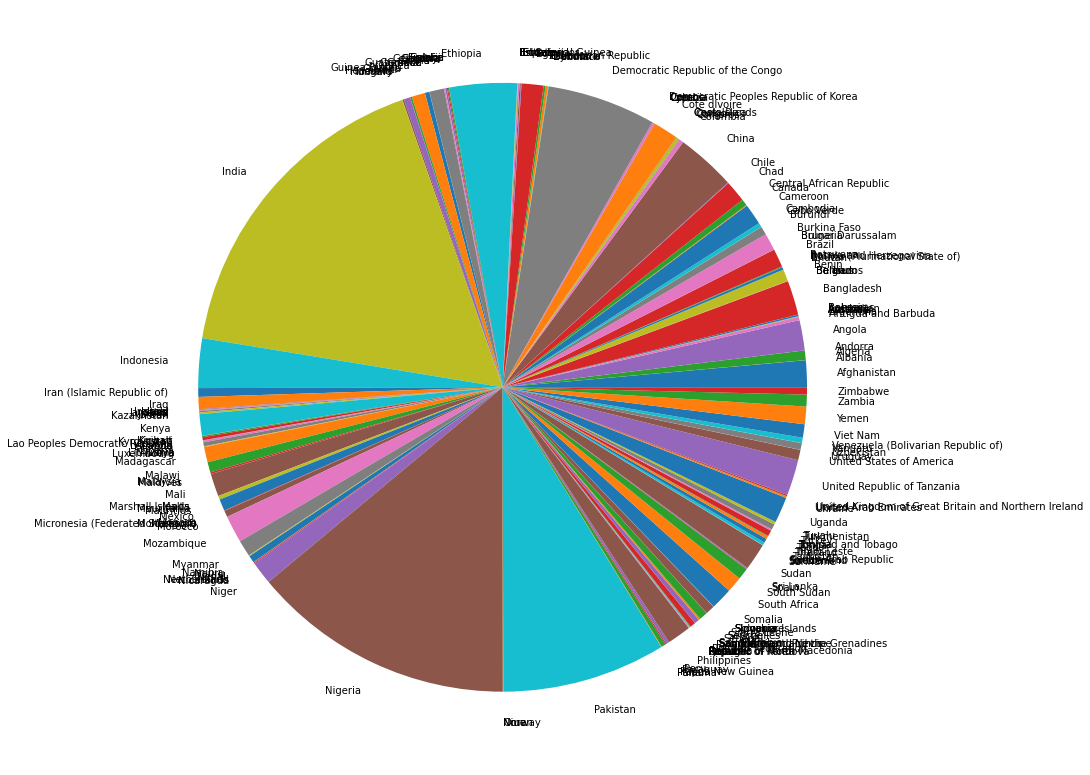

In [186]:
fig=plt.figure(figsize =(20, 14))
plt.pie(data_list_1, labels = country_list_1)

Largest numbers belong to India, Nigeria, Pakistan, DR Congo and Ethiopia.

Now we'll make a bar graph for adult female deaths in Indonesia

In [156]:
cur_adult = con_adult.cursor()

In [180]:
adult_years.sort()

In [181]:
data_list_2=[]
for year in adult_years:
    command='SELECT female FROM data_for_'+year+" WHERE country='Indonesia'"
    for result in cur_adult.execute(command):
        data_list_2.append(result[0])

In [182]:
data_list_2

[166,
 165,
 164,
 163,
 180,
 161,
 161,
 159,
 158,
 157,
 156,
 155,
 153,
 152,
 150,
 148,
 146]

<BarContainer object of 17 artists>

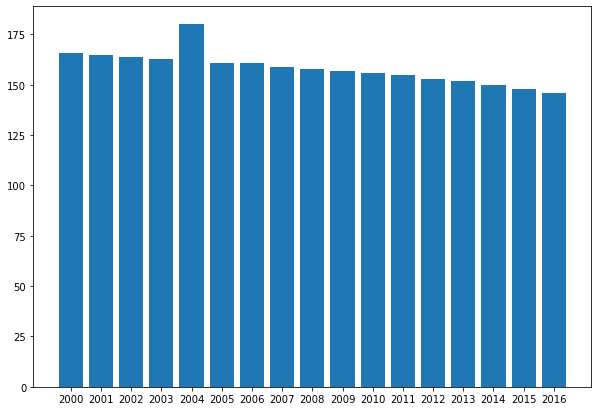

In [185]:
fig=plt.figure(figsize =(10, 7))
plt.bar(adult_years, data_list_2)

We notice a spike of death in 2004, likely due to the 2004 Earthquake and Tsunami. Aside from that, it can be seen that the number has a downward trend.